In [72]:
# default_exp core

In [73]:
#hide
import sys
sys.path.append('..')
import pandas as pd

In [74]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [75]:
#export
from fastcore.all import *
from fastai2.basics import *
from typing import List
import pandas as pd
import numpy as np

# Core functions

> API details.

## Utils

In [76]:
# export
from git import Repo
from nbdev.export import Config as nb_Config
from nbdev.export import *

def git_add(fname, commit_msg='.'):
    repo = Repo(nb_Config().nbs_path.parent)
    notebook2script(fname)
    nb = read_nb(fname)
    default = find_default_export(nb['cells'])
    py = [os.path.join(nb_Config().lib_path,*default.split('.'))+'.py',
          os.path.join(nb_Config().nbs_path,fname)
         ]
    repo.index.add(py)
    repo.index.commit(commit_msg)
    return py
    

In [77]:
fname = '00_core.ipynb'
git_add(fname)

Converted 00_core.ipynb.


['/home/tako/dev/fastseq/fastseq/core.py',
 '/home/tako/dev/fastseq/nbs/00_core.ipynb']

In [142]:
# export
def first_item(lst):
    if type(lst)==list or type(lst) == L:
        return lst[0]
    return lst

In [82]:
l = L(1,2,3)
test_eq(first_item(l),1)
l = [1,2,3]
test_eq(first_item(l),1)
test_eq(1,1)

In [83]:
# export

def concat_dct(new_dct, expand_dct):
    """Concatanates `torch.tensor`'s in `new_dct` to the same `key` in expand_dct'."""
    for k,v in new_dct.items():
        if isinstance(v,torch.Tensor):
            if k in expand_dct:
                expand_dct[k] = torch.cat([expand_dct[k],v], axis = 0)
            else:
                expand_dct[k] = v
        else:
            if k in expand_dct:
                expand_dct[k] = concat_dct(new_dct[k], expand_dct[k])
            else:
                expand_dct[k] = concat_dct(new_dct[k], {})

    return expand_dct

In [84]:
dct = defaultdict(dict)
new_d = {'foo':{'bar':torch.randn(4,4)}}
dct = concat_dct(new_d, dct)
print(dct['foo']['bar'].shape)
new_d = {'foo':{'bar':torch.randn(4,4)+10}}
dct = concat_dct(new_d, dct)
print(dct['foo']['bar'].shape)
new_d = {'foo':{'bar':torch.randn(8,4)+10}}
dct = concat_dct(new_d, dct)
print(dct['foo']['bar'].shape)

torch.Size([4, 4])
torch.Size([8, 4])
torch.Size([16, 4])


In [85]:
# export
def pad_zeros(X, lenght):
    return  np.pad(
                X,
                pad_width=((0, 0), (lenght - X.shape[-1], 0)),
                mode='constant',
                constant_values=0
            )

In [86]:
# export
def Skip(percentage_remove):
    """Helper function for `pd.read_csv` and will randomly not load `percentage_remove`% of the whole dataset """

    def skip(x):
        if (np.random.rand() < percentage_remove or x == 0):
            return False
        return True
    return skip

In [87]:
l = []
skip = Skip(.9)
for i in range(10000):
    if not skip(i):
        l.append(1)
    else:
        l.append(0)    
test_eq(l[0],1)
test_close(np.mean(l),.9,.01)

In [88]:
from fastseq.data.external import *
from fastai2.basics import *
path = untar_data(URLs.m4_daily)
pd.read_csv(path/'val.csv',skiprows = Skip(.9))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,D1,2039.20,2035.00,2051.80,2061.80,2063.50,2069.50,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
1,D2,2986.00,3001.20,2975.90,2996.10,2981.90,2985.50,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
2,D3,1120.70,1117.90,1115.10,1112.30,1109.50,1106.70,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
3,D4,1190.00,1162.00,1134.00,1106.00,1078.00,1050.00,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
4,D5,5904.67,5917.05,5922.58,5928.80,5935.29,6002.80,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,D4222,2203.00,2201.00,2229.00,2239.00,2193.00,2189.00,2204.00,2207.00,2221.00,2244.00,2227.00,2222.00,2247.00,2248.00
3777,D4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00
3778,D4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00
3779,D4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.00,4167.00,4145.00,4168.00,4068.00,4066.00


In [89]:
#export
# TODO skip will skip different rows for train and val

def get_ts_files(path, recurse=True, folders=None, **kwargs):
    "Get image files in `path` recursively, only in `folders`, if specified."
    items = []
    for f in get_files(path, extensions=['.csv'], recurse=recurse, folders=folders):
        df = pd.read_csv(f, **kwargs)
        items.append(ts_lists(df.iloc[:, 1:].values))
    return items

In [90]:
# train, val = get_ts_files(path, nrows=1000)

In [91]:
# export
def IndexsSplitter(train_idx, val_idx=None, test=None):
    """Split `items` from 0 to `train_idx` in the training set, from `train_idx` to `val_idx` (or the end) in the validation set.

    Optionly if `test` will  in test set will also make test from val_idx to end.
    """
    _val_idx = ifnone(val_idx,-1)
    do_test = ifnone(test, False)
    def _inner(items, **kwargs):
        if _val_idx == -1:
            val_idx = len(items)
        else:
            val_idx = _val_idx
        train = L(np.arange(0, train_idx), use_list=True)
        valid = L(np.arange(train_idx, val_idx), use_list=True)
        if do_test:
            test = L(np.arange(val_idx,len(items)), use_list=True)
            return train, valid, test
        if not val_idx == len(items):
            warnings.warn("You lose data")
        return train, valid
    return _inner

In [92]:
items = list(range(10))
splitter = IndexsSplitter(5,8)
test_eq(splitter(items),(L(0,1,2,3,4),L(5,6,7)))

/home/tako/dev/env37/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You lose data


In [93]:
splitter = IndexsSplitter(5,8,True)
test_eq(splitter(items),(L(0,1,2,3,4),L(5,6,7),L(8,9)))

## Uni Types

In [94]:
# export
class TSeries(TensorBase):pass

In [95]:
#export

def no_emp_dim(x):
    if len(x.shape)==1 :
        x = x[None,:]
    return np.vstack(x)

def show_graph(array, ax=None, figsize=None, title=None, ctx=None, tx=None, **kwargs):
    "Show an array on `ax`."
    # Handle pytorch axis order
    if hasattrs(array, ('data','cpu','permute')):
        array = array.data.cpu()
    elif not isinstance(array,np.ndarray):
        array=array(array)
    arrays = no_emp_dim(array)
    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (5,5)
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    tx = ifnone(tx,np.arange(arrays[0].shape[0]))
    label = kwargs.pop('label', 'x')
    for a, c in zip(arrays, ['b', 'c', 'm', 'y', 'k',]):
        ax.plot(tx, a, '-*'+c,label=label, **kwargs)

    if title is not None: ax.set_title(title)

    ax.legend()
#     ax.axis('off')
    return ax

In [96]:
# export
def test_graph_exists(ax):
    "Test there is a graph displayed in `ax`"
    assert ax

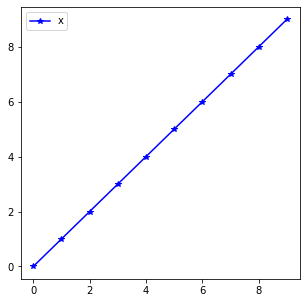

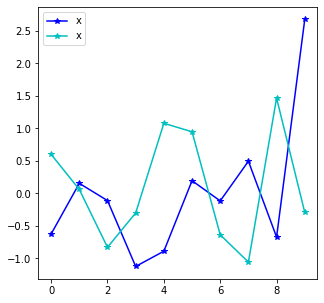

In [97]:
# hide
a = TSeries(np.arange(10))
ax = show_graph(a)
test_graph_exists(ax)

a = TSeries(np.random.randn(2,10))[None,:]
ax = show_graph(a)
test_graph_exists(ax)

show_graph can show an array...

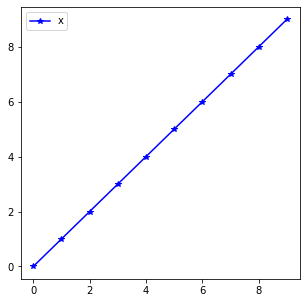

In [98]:
a = np.arange(10)
ax = show_graph(a)

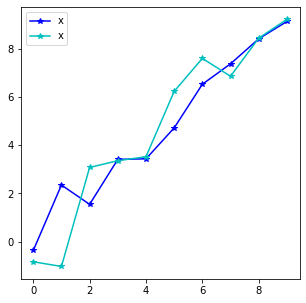

In [99]:
a = tensor(np.arange(10)+np.random.randn(2,10))[None,:]
ax = show_graph(a)

In [100]:
# export
class TensorSeq(TensorBase):
    def show(self, ctx=None, **kwargs):
        return show_graph(self, ctx=ctx, **kwargs)

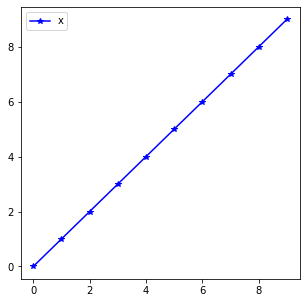

In [101]:
ax = TensorSeq(np.arange(10)).show()

In [102]:
# export
class TSTensorSeq(TensorSeq): pass
class TSTensorSeqy(TensorSeq):

    @classmethod
    def create(cls, t)->None:
        "Convert an array or a list of points `t` to a `Tensor`"
        return cls(tensor(t).float())

    def show(self, ctx=None, **kwargs):
        if 'figsize' in kwargs:
            del kwargs['figsize']
        array = np.array(self.cpu())
        array = no_emp_dim(array)
        x_len = self._meta.get('x_len',0)
        m = self._meta.get('m','*g')
        label = self._meta.get('label','y')
        t = np.arange(x_len,x_len+array.shape[1])[None,:]
        ctx.plot(t.T, array.T, m, label=label, **kwargs)
        ctx.legend()
        return ctx

TSTensorSeqy.loss_func = MSELossFlat()

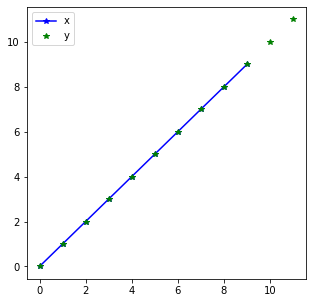

In [103]:
ts = TSTensorSeq(np.arange(10))
ctx = ts.show()

y = TSTensorSeqy(np.arange(12))
y.show(ctx=ctx)

In [104]:
#export
from fastai2.vision.data import *

@delegates(subplots)
def show_graphs(arrays, rows=None, cols=None, figsize=None, titles=None, **kwargs):
    "Show all images `arrays` as subplots with `rows` using `titles`"
    if titles is None: titles = [None]*len(arrays)
    axs = get_grid(len(arrays), rows=rows, cols=cols, add_vert=1, figsize=figsize)
    for a,t,ax in zip(arrays, titles, axs):
        ctx = show_graph(a[0], ax=ax, title=t)
        for y in a[1:]:
            ctx = y.show(ctx=ctx)
    return axs

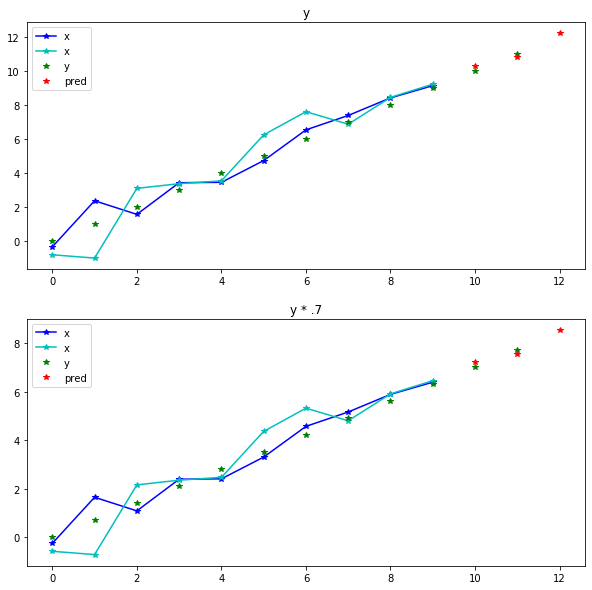

In [105]:
y_hat = TSTensorSeqy(np.array([10.3,10.8,12.2]), x_len=10, m='*r', label='pred')

show_graphs(((a, y, y_hat), (a*.7, y*.7, y_hat*.7)), titles=('y','y * .7'), figsize=(10,10))

In [106]:
# hide
test_graph_exists(ax)

## Multi Types

In [107]:
class TSeries(TensorBase):pass

In [108]:
def no_emp_dim(x):
    if len(x.shape)==1 :
        x = x[None,:]
    return np.vstack(x)

def show_graph(array, ax=None, figsize=None, title=None, ctx=None, tx=None, **kwargs):
    "Show an array on `ax`."
    if hasattrs(array, ('data','cpu','permute')):
        array = array.data.cpu()
    elif not isinstance(array,np.ndarray):
        array=array(array)
    arrays = no_emp_dim(array)
    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (5,5)
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    tx = ifnone(tx,np.arange(arrays[0].shape[0]))
    label = kwargs.pop('label', 'x')
    for a, c in zip(arrays, ['b', 'c', 'm', 'y', 'k',]):
        ax.plot(tx, a, '-*'+c,label=label, **kwargs)

    if title is not None: ax.set_title(title)

    ax.legend()
#     ax.axis('off')
    return ax

In [109]:
# export
import matplotlib.colors as mcolors
_colors = [v for k,v in mcolors.TABLEAU_COLORS.items()]
_colors += [v for k,v in mcolors.TABLEAU_COLORS.items()]# could be done better but ...
class TensorSeqs(TSeries):    
    def show(self, ax = None, ctx=None, **kwargs):
        ctx = ifnone(ctx, ax)
        if ctx is None: _, ctx = plt.subplots(figsize=(5,5))
        array = np.array(self.cpu())
        arrays = no_emp_dim(array)
        m = L(self._meta.get('m',_colors[:len(arrays)]))
        labels = L(self._meta.get('label',['x']*len(arrays)))
        if arrays.shape[-1] == 0:
            if len(labels):
                ctx.set_title(ctx.title._text +f"{labels} is empty")
            return ctx
        assert len(m)==len(labels)==len(arrays),f"{len(m)}=={len(labels)}=={len(arrays)}" 
        t = np.arange(array.shape[-1])        
        for a, c, label in zip(arrays, m, labels):            
            ls = ('-',None) if 'y' not in label else ('None','*' )
            ctx.plot(t, a, ls = ls[0], marker = ls[1], c=c, 
                     **kwargs, label=label)
        ctx.legend()
        return ctx
class TensorSeqsX(TensorSeqs):pass


In [110]:
a = torch.cat([i+torch.arange(10)[None,:] for i in [0,2]])
print(a, a.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]]) torch.Size([2, 10])


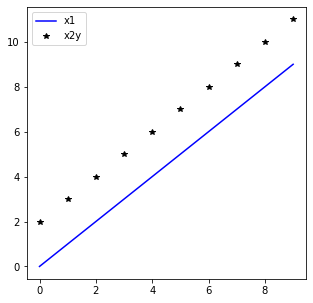

In [111]:
_, ctx = plt.subplots(figsize=[5,5])
ax = TensorSeqs(a, m=['b','k'], label = ['x1','x2y']).show(ctx=ctx)

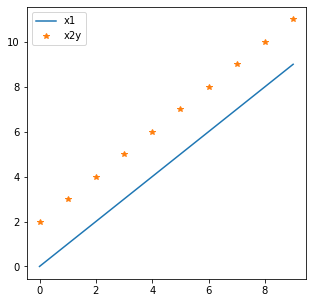

In [112]:
# hide
# adding extra dim before to see if it than still works
TensorSeqs(a[None,:], label = ['x1','x2y']).show()

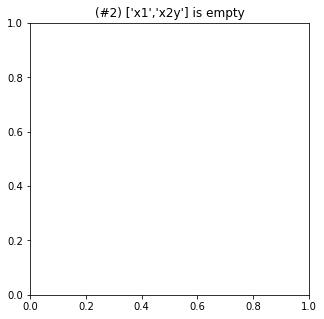

In [113]:
# hide
# empty
TensorSeqs(np.ones([1,10,0]), label = ['x1','x2y']).show()

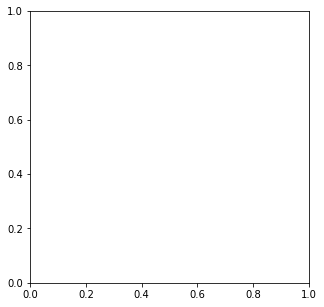

In [114]:
# hide
test_fail(TensorSeqs(torch.randn(2,10), m='b', label = ['x1','y2']).show)

In [115]:
# export
def _get_its_shape(o):    
    if len(o.shape) == 0: return 1, o[None]
    return len(o), o
    

class TensorCon(TSeries):
    _name = 'Constant'
    def show(self, ax = None, ctx=None):
        ax = ifnone(ax,ctx)
        if ax is None:
            _, ax = plt.subplots(figsize=(5,5))
        l, its = _get_its_shape(self)
        dct = {k:np.round(its[i].item(),2) for k,i in zip(L(self._meta.get('label',self._name)),range(l))}
        if dct == {}:
            dct = ''
        ax.set_title(ax.title._text +f"{dct}")
        return ax

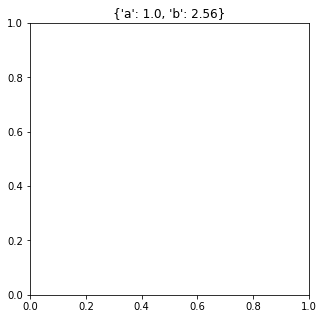

In [116]:
TensorCon([1, 2.5555555555555], label=['a','b']).show()

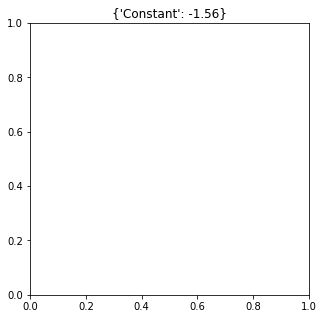

In [117]:
TensorCon([[-1.5607],
        [-1.5607],
        [-1.5607],
        [-1.5607],
        [ 0.8909],
        [ 0.8909],
        [ 0.8909],
        [ 0.8909],
        [-0.0499],
        [-0.0499],
        [-0.0499],
        [-0.0499],
        [ 0.7197],
        [ 0.7197],
        [ 0.7197],
        [ 0.7197]]).show()

In [263]:
# export
class TensorCat():  
    _name = 'Catagory' 
    def __init__(self, o, label = None):
        if isinstance(o, TensorCat):
            o, label = o.o, o._meta['label']
        assert label is not None, f"label is not optional"
        self.o = L(o)    
        self._meta ={'label': label}
        self.k2i = {k:i for i,k in enumerate(self._meta['label'])}
        self.shape = (len(o),)
        
    def _dct(self):
        return {k:v for k,v in zip(self._meta['label'], self.o)}
    
    def __repr__(self):
        return f"TensorCat({list(self.o)}, label = {list(self._meta['label'])})"
    
    def __eq__(self, o):
        if isinstance(o, TensorCat):
            return self.o == self.o
        return False
    
    def show(self, ax = None, ctx=None):
        ax = ifnone(ax,ctx)
        if ax is None:
            _, ax = plt.subplots(figsize=(5,5))            
        dct = self._dct()
        if dct == {}:
            dct = ''
        ax.set_title(ax.title._text +f"{dct}")
        return ax
    


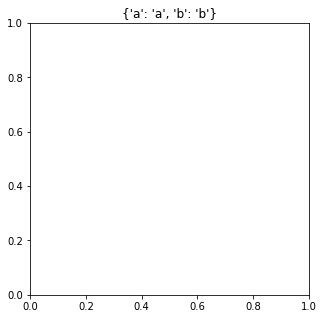

In [264]:
a =  TensorCat(TensorCat(['a','b'], label=['a','b']))
a.show()

In [265]:
a == TensorCat(['a','b'], label=['a','b'])

True

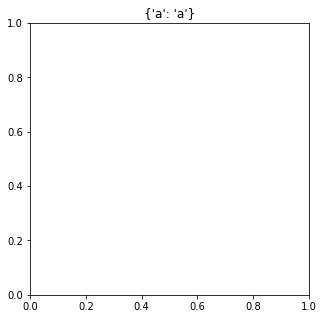

In [267]:
a = TensorCat(['a','b'],'a')
a.show()

In [268]:
print(a)

TensorCat(['a', 'b'], label = ['a'])


In [316]:
# export
class CatSeq(TensorCat):
    def __init__(self, o:List[List[str]], label):
        if isinstance(o, CatSeq):
            o, label = o.o, o._meta['label']
        self.o = o
        self._meta ={'label': label}
        self.shape = np.array(o).shape
#         assert len(self.shape) == 2, f"shape of input in CatSeq not the correct size {self.o}"
        
    def _dct(self):
        return {k:v for k,v in zip(self._meta['label'],self.o)}
    
    def __repr__(self):
        return f"CatSeq({list(self.o)}, label = {list(self._meta['label'])})"
    
    def __eq__(self, o):
        if isinstance(o, TensorCat):
            return self.o == self.o
        return False    
    
    def show(self, ax = None, ctx=None):
        ax = ifnone(ax,ctx)
        if ax is None:
            _, ax = plt.subplots(figsize=(5,5))            
        lst =  '\n'.join(self._dct().keys())
        
        if lst == '':
            lst = ''
        elif len(self._dct()) == 1:
            lst = 'CatSeq:\n' +lst
        else:
            lst = 'CatSeqs:\n' +lst            
        ax.text(0.01, 0.99, lst,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=15)
        return ax

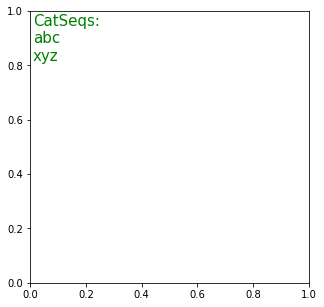

In [317]:
o = CatSeq([['a','b','c'],['x','y','z'] ],label=['abc','xyz'])
o.show()

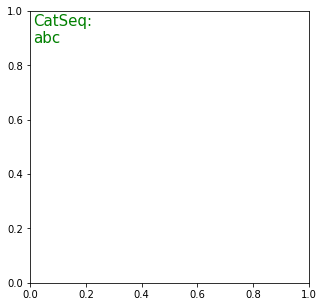

In [318]:
o = CatSeq([['a','b','c']],label=['abc'])
o.show()

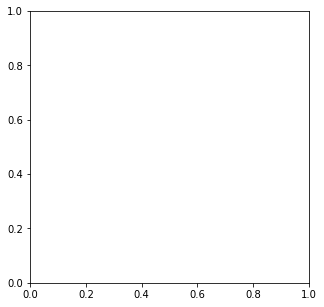

In [320]:
o = CatSeq([['']],label=[])
o.show()

## MultiTuple

In [125]:
# export
class MultiTuple(Tuple):
    """The same as `Tuple` only stores the types in `_types` and if _meta stores those in `_meta`"""
    def __new__(cls, x, *rest, **kwargs):
        r = Tuple.__new__(cls,x, *rest)
        r._meta = {i:a._meta for i,a in enumerate(L(r)) if hasattr(a,'_meta')}
        r._types = [type(a) for a in L(r)]
        return r

In [126]:
o = MultiTuple(1)
o, o._meta, o._types

((1), {}, [int])

In [127]:
a = TensorBase(tensor(1), label='x')
b = TensorBase(tensor(1), label='y')
print(a._meta)
o = MultiTuple((a,b))
o, getattr(o,'_meta',None), o._types

{'label': 'x'}


((TensorBase(1), TensorBase(1)),
 {0: {'label': 'x'}, 1: {'label': 'y'}},
 [fastai2.torch_core.TensorBase, fastai2.torch_core.TensorBase])

In [128]:
# hide
test_eq(o._meta,{0: {'label': 'x'}, 1: {'label': 'y'}})
test_eq(o._types,[TensorBase, TensorBase])
o = MultiTuple(1)
test_eq(o._meta,{})
test_eq(o._types,[int])

In [129]:
# export
from fastai2.vision.data import get_grid
def _show_multituple(t, ax):
    for o in t:
        ax = o.show(ctx = ax)
    return ax

def get_ax(ax, ctx, figsize, **kwargs):
    ax = ifnone(ax,ctx)
    if ax is None:
        _, ax = plt.subplots(figsize=figsize, **kwargs)
    return ax

@delegates(plt.subplots)
def show_mt(self, ax = None, ctx=None, figsize = (10,10), **kwargs):
    ax = get_ax(ax, ctx, figsize, **kwargs)
    return _show_multituple(self, ax)   
MultiTuple.show = show_mt

In [130]:
show_doc(MultiTuple.show,name='MultiTuple.show')

<h4 id="MultiTuple.show" class="doc_header"><code>MultiTuple.show</code><a href="__main__.py#L14" class="source_link" style="float:right">[source]</a></h4>

> <code>MultiTuple.show</code>(**`ax`**=*`None`*, **`ctx`**=*`None`*, **`figsize`**=*`(10, 10)`*, **`nrows`**=*`1`*, **`ncols`**=*`1`*, **`sharex`**=*`False`*, **`sharey`**=*`False`*, **`squeeze`**=*`True`*, **`subplot_kw`**=*`None`*, **`gridspec_kw`**=*`None`*)



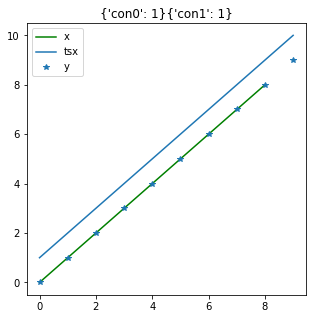

In [131]:
x,xts,a,b = TensorSeqs(np.arange(9)[None,:],label=['x'],m=['g']),TensorSeqs(np.arange(1,11)[None,:],label=['tsx']), TensorCon(1,label=['con0']),TensorCon(1, label=['con1'], m='r')
y = TensorSeqs(np.arange(10)[None,:],label=['y'])
MultiTuple(x,xts,a,b,y).show(figsize = (5,5))

# Preprocces functions

## M4

In [132]:
# export
def ts_lists(ts:np.ndarray)-> L:
    """Transforms a `np.ndarray` of shape (timeseries, max_time) to a list of timeseries with shape (1,time).

    where:

    max_time = the length of the longest timeserie

    time = the length of the non-nan values of that specific timeserie
    """
    lst = L()
    for time_series in ts:
        lst.append(time_series[~np.isnan(time_series)][None,:])
    return lst

In [133]:
# hide
ts = np.array([np.arange(0,10.),
               np.arange(0,10.)
              ])
ts[1,-1] = np.NaN

r = ts_lists(ts)
test_eq(r[0],np.arange(0,10.)[None,:])
test_eq(r[1],np.arange(0,9.)[None,:])
test_eq(r[0].shape,(1,10))

In [134]:
ts

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan]])

In [135]:
ts_lists(ts)

(#2) [array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]]),array([[0., 1., 2., 3., 4., 5., 6., 7., 8.]])]

In [321]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 020_data.load_pd.ipynb.
Converted 02_data.load.ipynb.
Converted 030_data.core_pd.ipynb.
Converted 03_data.core.ipynb.
Converted 050_nbeats.models_multi.ipynb.
Converted 05_nbeats.models.ipynb.
Converted 06_nbeats.callbacks.ipynb.
Converted 07_nbeats.learner.ipynb.
Converted 08_nbeats.interpret.ipynb.
Converted 11_metrics.ipynb.
Converted 12_compare.ipynb.
Converted index.ipynb.
Converted tab.model.ipynb.


In [277]:
git_add('00_core.ipynb',commit_msg='CatSeq.show() text')

Converted 00_core.ipynb.


['/home/tako/dev/fastseq/fastseq/core.py',
 '/home/tako/dev/fastseq/nbs/00_core.ipynb']